# Unsupervised Machine Learning for HELP International

## Project Overview and Brief

This dataset contains socio-economic and health factors that determine the overall development of countries. The purpose of the dataset is to help a charity fighting poverty to identify groups of
countries where it is needed most.

*Original file name:* country-data.csv

> **Find out more** about this dataset [here](https://www.kaggle.com/rohan0301/unsupervised-learning-on-country-data)

### Objective:

To categorise the countries using socio-economic and health factors that determine the overall development of the country. *Example insight:* Which countries can be grouped together and have the highest need of help from the charity?

### About organization:

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of developing countries with basic amenities and relief during the time of disasters and natural calamities.

### Problem Statement:

HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

### Extension

To extend the project, try using two different unsupervised learning algorithms and use methods
to measure their accuracy. Which model would you choose? Why?

## Import Packages and Dataset

In [119]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from pandas_profiling import ProfileReport
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

# scaling 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# kmeans clustering 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

# multivariate linear regression
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# geo data
import geopandas as gpd
from geopandas import GeoDataFrame as gdf
import plotly.express as px

In [120]:
country = pd.read_csv('country.csv')
country.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

## Descriptive Analysis

Descriptive analysis is being completed to summarise the dataset. This initial analysis is performed first to help build familiarity with the dataset and inform better decisions when building models later on. It is important at this stage not to generalise the results of this analysis for application to a larger population or try to make conclusions.

|Feature Name | Definition | Units/Measure |
|-------------|------------|---------------|
|country |Name of the country. |N/A |
|child_mort |Death of children under 5 years of age. |Average death count per 1000 live births |
|exports |Exports of goods and services per capita. |% GDP per capita |
|health |Total health spending per capita. |% GDP per capita |
|imports |Imports of goods and services per capita. |% GDP per capita |
|income |Net income per person. |US Dollars ($) |
|inflation |The measurement of the annual growth rate of the Total GDP. |GDP |
|life_expec |The average number of years a new born child would live if the current mortality patterns are to remain the same. |Average years |
|total_fer | The number of children that would be born to each woman if the current age-fertility rates remain the same. |Average number of children |
|gdpp | The GDP per capita. Calculated as the Total GDP divided by the total population. |GDP |


In [121]:
country.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

### Descriptive Analysis Takeaways

As the aim of the study is to ascertain which countries are most in need, the current focus will be identifying values assumed to be critical to a nation's overall wellbeing (e.g. highest income nation will not be recorded below).


- Globally, a mean value of 38 children out of every 1000 live births don't live to see age 5 years old. 
- The highest recorded child death count in a single nation is 208 (Haiti) which is more than 5 times the global mean.
- The country with the lowest health spending of 1.81% GDP per capita is Qatar (the global mean is around 4 times higher) 
- The country with the lowest life expectancy of 32.1 years is Haiti (the global mean is around 2 times higher) 
- The country with the lowest exports of 0.109% GDP per capita is Myanmar (the global mean is around 380 times higher) 
- The country with the lowest imports of 0.0659% GDP per capita is Myanmar (the global mean is around 710 times higher) 
- The country with the lowest income of $609 is Democratic Republic of Congo (the global mean is around 28 times higher) 
- The country with the lowest total fertility of 1.15 children born if fertility rates stay the same is Singapore (the global mean is around 2.5 times higher) 
- The country with the lowest gdpp of 231 GDP is Burundi (the global mean is around 56 times higher) 
- The country with the highest inflation of 104 GDP growth rate per year is Nigeria (around 13 times higher than the global mean)   


## Exploratory Analysis

**ref** Data Scientist's Toolbox Coursera
The goal of exploratory analysis is to examine or explore the data and find relationships that weren’t previously known. Exploratory analyses explore how different measures might be related to each other but do not confirm that relationship as causitive. You’ve probably heard the phrase “Correlation does not imply causation” and exploratory analyses lie at the root of this saying. Just because you observe a relationship between two variables during exploratory analysis, it does not mean that one necessarily causes the other.
Because of this, exploratory analyses, while useful for discovering new connections, should not be the final say in answering a question! It can allow you to formulate hypotheses and drive the design of future studies and data collection, but exploratory analysis alone should never be used as the final say on why or how data might be related to each other.


In [122]:
country_profile = ProfileReport(country, title="Country Data Profiling Report", explorative=True)

In [123]:
country_profile.to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [00:02<00:00,  2.23s/it]


### Profiling Report Takeaways

- There are no missing or duplicate rows
- There are 10 features/columns of which there are 
    - 9 Numerical
    - 1 Categorical (country)  
- There are 167 countries listed 
- The following **high correlations** were found:
    - child_mort is highly correlated with income
    - exports is highly correlated with imports
    - life_expec is highly correlated with child_mort
    - total_fer is highly correlated with child_mort
    - gdpp is highly correlated with child_mort
    - gdpp is highly correlated with income
    - child_mort is highly correlated with inflation 
    - health is highly correlated with income
    - income is highly correlated with exports
    - gdpp is highly correlated with exports
    - country is uniformly distributed

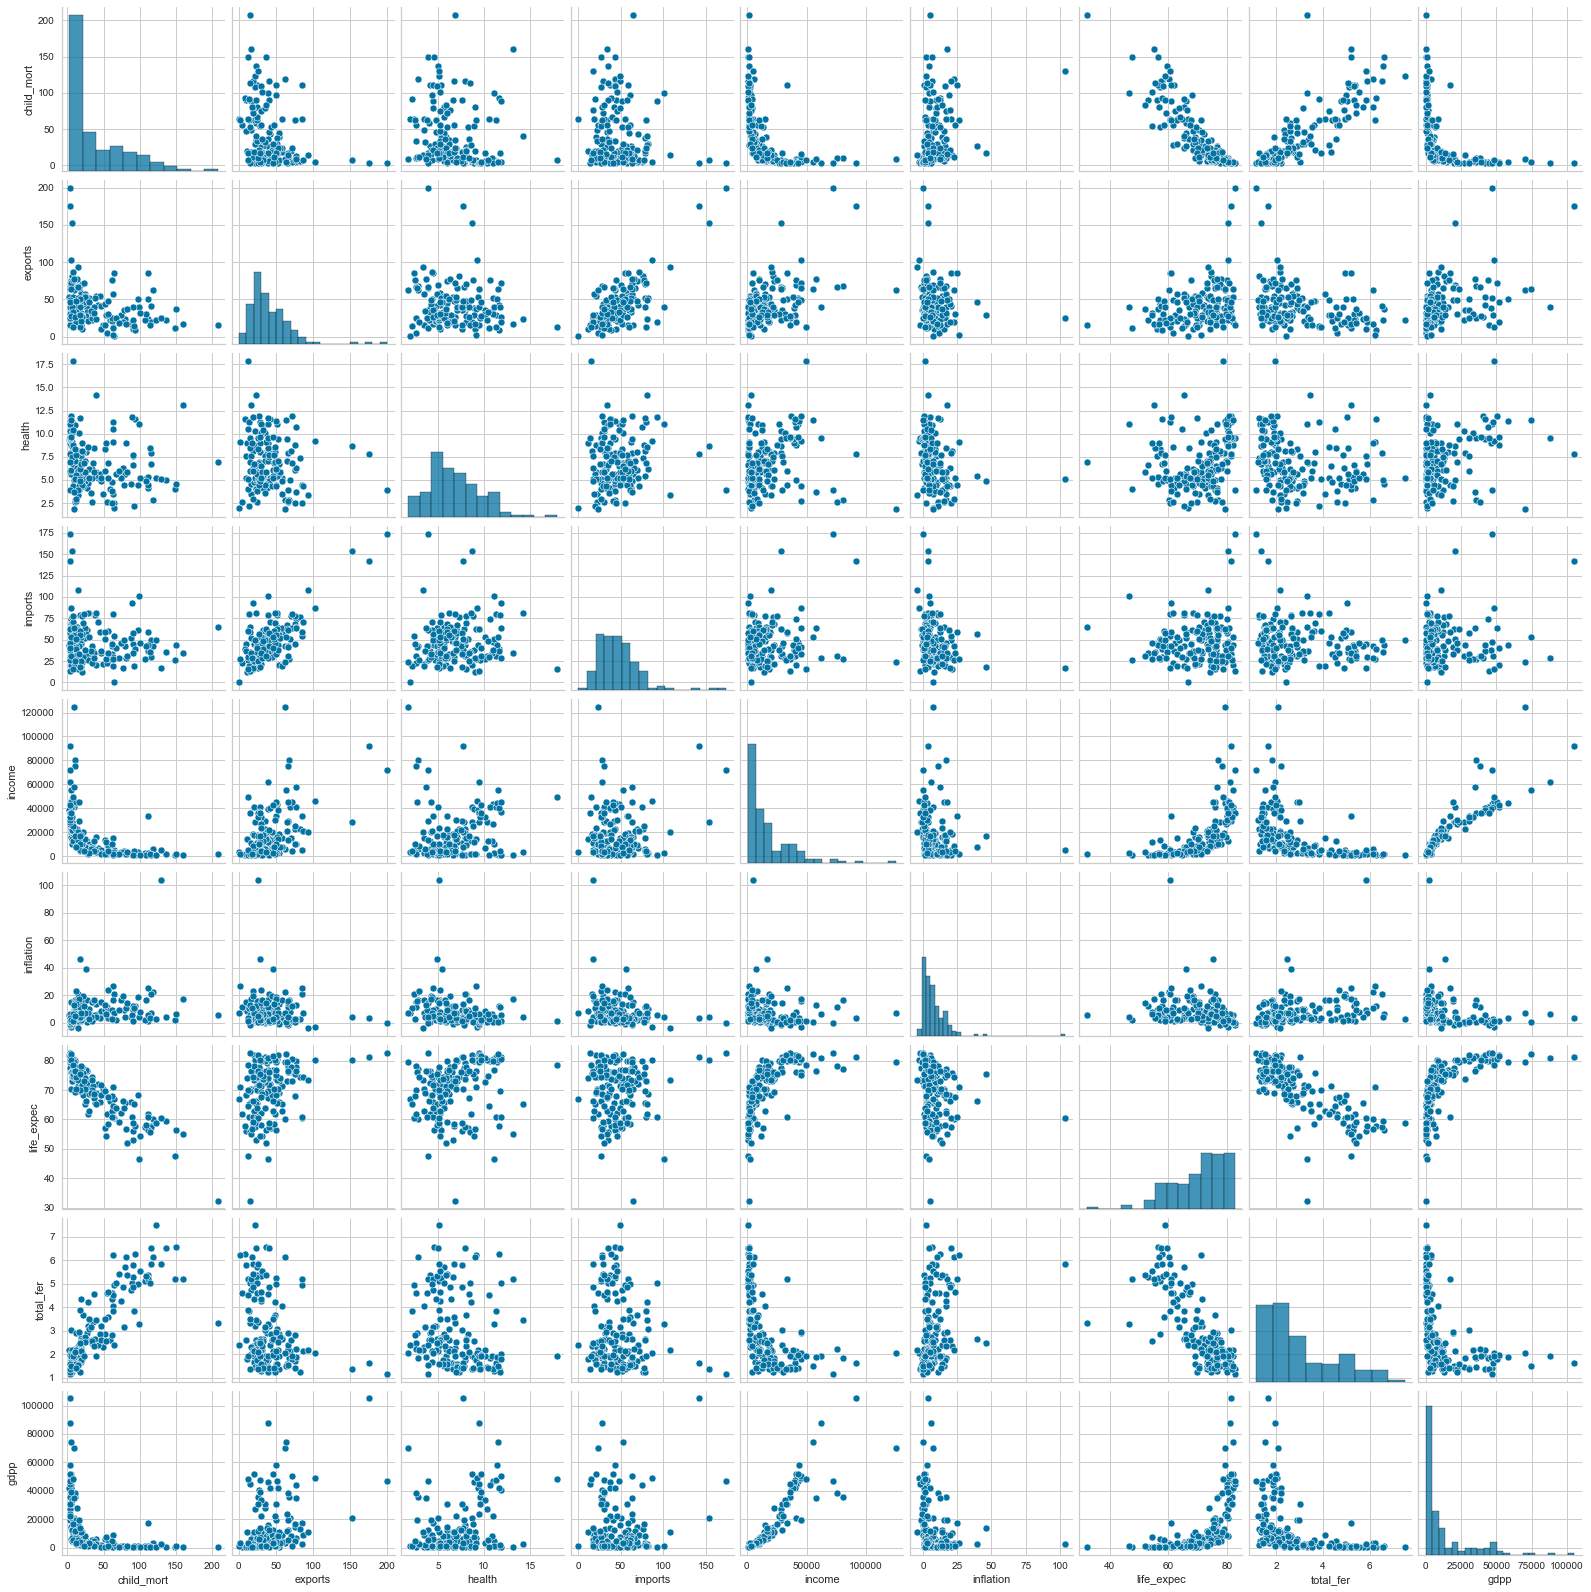

In [124]:
# Pairplot to see correlations visualised
sns.pairplot(country, palette='Set1')

### Pairplot Correlations Summarised

- child_mort is negatively correlated with income
- exports is positively correlated with imports
- life_expec is negatively correlated with child_mort
- total_fer is positively correlated with child_mort
- gdpp is negatively correlated with child_mort
- gdpp is positively correlated with income
- child_mort is positively correlated with inflation 
- health is positively correlated with income
- income is positively correlated with exports
- gdpp is positively correlated with exports

In [125]:

# replace Congo name
country.at[37, 'country'] = 'Democratic Republic of the Congo'
country.at[38, 'country'] = 'Republic of the Congo'

# select a single row using the below format
#country.loc[country['country'] == "Cote d'Ivoire"]

In [126]:
# replace ivory coast name
country.at[40, 'country'] = 'Ivory Coast'

In [127]:
country.loc[country['country'] == "Ivory Coast"]

country  child_mort  exports  health  imports  income  inflation  \
40  Ivory Coast       111.0     50.6     5.3     43.3    2690       5.39   

    life_expec  total_fer  gdpp  
40        56.3       5.27  1220

In [128]:
# replace Laos name
country.at[84, 'country'] = 'Laos'

In [129]:
country.loc[country['country'] == "Laos"]

country  child_mort  exports  health  imports  income  inflation  \
84    Laos        78.9     35.4    4.47     49.3    3980        9.2   

    life_expec  total_fer  gdpp  
84        63.8       3.15  1140

In [130]:
# replace macedonia
country.at[92, 'country'] = 'Macedonia'

In [131]:
country.loc[country['country'] == "Macedonia"]

country  child_mort  exports  health  imports  income  inflation  \
92  Macedonia        10.4     39.8    7.09     58.1   11400       2.04   

    life_expec  total_fer  gdpp  
92        74.0       1.47  4540

In [132]:
country.at[101, 'country'] = 'Micronesia'

In [133]:
country.loc[country['country'] == "Micronesia"]

country  child_mort  exports  health  imports  income  inflation  \
101  Micronesia        40.0     23.5    14.2     81.0    3340        3.8   

     life_expec  total_fer  gdpp  
101        65.4       3.46  2860

In [134]:
country.at[141, 'country'] = 'Saint Vincent and the Grenadines'

In [135]:
country.loc[country['country'] == "Saint Vincent and the Grenadines"]

country  child_mort  exports  health  imports  \
141  Saint Vincent and the Grenadines        20.7     26.9    4.47     57.1   

     income  inflation  life_expec  total_fer  gdpp  
141    9920       4.44        71.6       2.07  6230

In [136]:
country.at[149, 'country'] = "Timor-Leste" # invalid TL country code, this country is in Asia so find a way to append to continent column afterwards. Row data for TL is stored below.

In [137]:
country.loc[country['country'] == "Timor-Leste"]

country  child_mort  exports  health  imports  income  inflation  \
149  Timor-Leste        62.6      2.2    9.12     27.8    1850       26.5   

     life_expec  total_fer  gdpp  
149        71.1       6.23  3600

|    |country |child_mort |exports |health |imports |income |inflation |life_expec |total_fer |gdpp |
|----|--------|-----------|--------|-------|--------|-------|----------|-----------|----------|-----|
|149 |Timor-Leste |62.6 |2.2 |9.12 |27.8 |1850.0 |26.5 |71.1 |6.23 |3600.0 |


In [138]:
# Create extra feature for continents



continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU': 'Europe'
}

countries = country['country']

[continents[country_alpha2_to_continent_code(country_name_to_country_alpha2(country))] for country in countries]


KeyError: "Invalid Country Alpha-2 code: 'TL'"

In [ ]:
country_cont = country.copy()
country_cont.insert(1, "continents", [continents], True)

## Inferential Analysis 

**ref** Data Scientist's Toolbox Coursera
The goal of inferential analyses is to use a relatively small sample of data to infer or say something about the population at large. Inferential analysis is commonly the goal of statistical modelling, where you have a small amount of information to extrapolate and generalize that information to a larger group.
Inferential analysis typically involves using the data you have to estimate that value in the population and then give a measure of your uncertainty about your estimate. Since you are moving from a small amount of data and trying to generalize to a larger population, your ability to accurately infer information about the larger population depends heavily on your sampling scheme - if the data you collect is not from a representative sample of the population, the generalizations you infer won’t be accurate for the population.

## Causal Relationship Analysis

**ref** Data Scientist's Toolbox Coursera
The caveat to a lot of the analyses we’ve looked at so far is that we can only see correlations and can’t get at the cause of the relationships we observe. Causal analysis fills that gap; the goal of causal analysis is to see what happens to one variable when we manipulate another variable - looking at the cause and effect of a relationship.
Generally, causal analyses are fairly complicated to do with observed data alone; there will always be questions as to whether it is correlation driving your conclusions or that the assumptions underlying your analysis are valid. More often, causal analyses are applied to the results of randomized studies that were designed to identify causation. Causal analysis is often considered the gold standard in data analysis, and is seen frequently in scientific studies where scientists are trying to identify the cause of a phenomenon, but often getting appropriate data for doing a causal analysis is a challenge.
One thing to note about causal analysis is that the data is usually analysed in aggregate and observed relationships are usually average effects; so, while on average giving a certain population a drug may alleviate the symptoms of a disease, this causal relationship may not hold true for every single affected individual.